In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
df_house = pd.read_csv('..//database//House-price//Housing.csv')

In [21]:
df_house.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [22]:
df_house['price'] = df_house['price']/1000

In [23]:
df_house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.00,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250.00,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250.00,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215.00,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410.00,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820.00,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767.15,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750.00,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750.00,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [24]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [25]:
df_house['stories'].unique()

array([3, 4, 2, 1], dtype=int64)

In [26]:
correlation = df_house[['price','area', 'bedrooms', 'bathrooms', 'stories','parking']].corr()

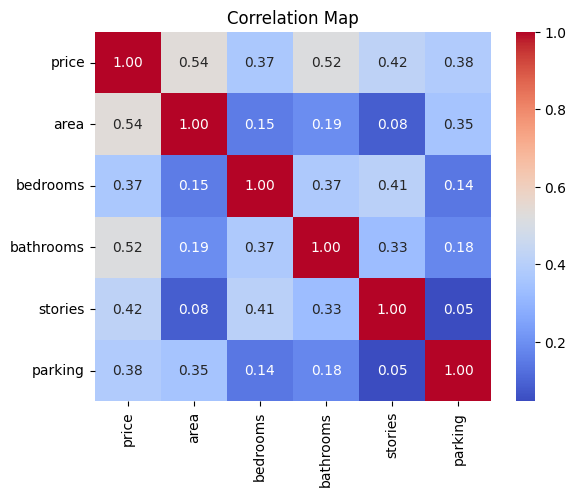

In [27]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map')
plt.show()

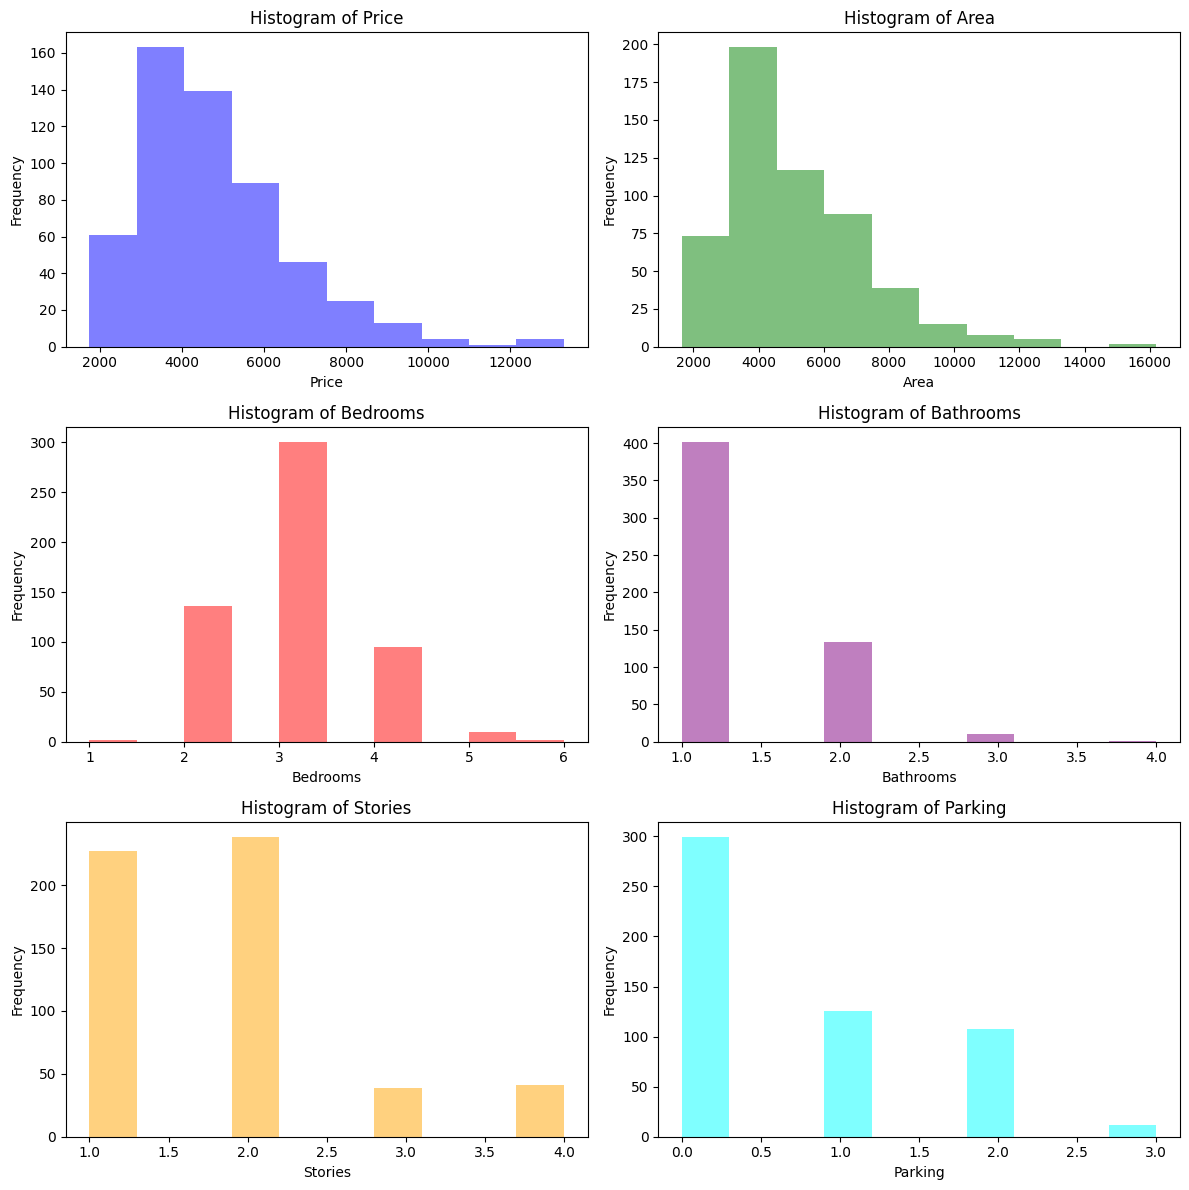

In [28]:
fig, ax = plt.subplots(3,2, figsize=(12,12))

numerical_features = ['price','area', 'bedrooms', 'bathrooms', 'stories','parking']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax[row, col].hist(df_house[feature], bins=10, color=colors[i], alpha=0.5)
    ax[row, col].set_title(f'Histogram of {feature.capitalize()}')
    ax[row, col].set_xlabel(feature.capitalize())
    ax[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
X_HOUSE = df_house[['area']]
Y_HOUSE = df_house['price']

Text(0, 0.5, 'Price')

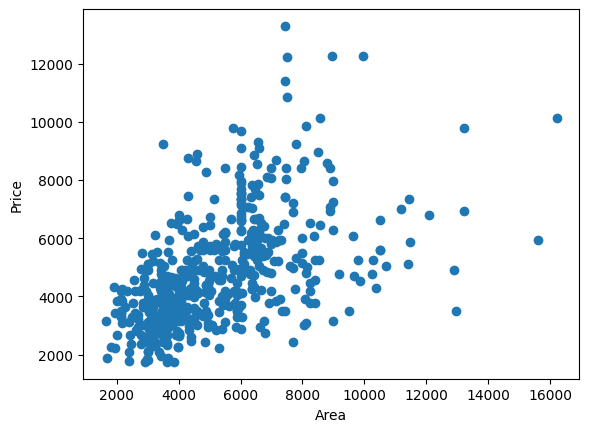

In [30]:
plt.scatter(X_HOUSE,Y_HOUSE)
plt.xlabel('Area')
plt.ylabel('Price')

In [31]:
# Divide train and test data

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X_HOUSE,Y_HOUSE,test_size=0.3, random_state=40)

In [32]:
house_model = LinearRegression()

In [33]:
house_model.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

In [34]:
df_prediction = pd.DataFrame({
    'Area': X_TEST['area'],
    'Price': house_model.predict(X_TEST)
})

In [ ]:
df_prediction.sort_values(by='Area')

In [ ]:
df_house[df_house['area'] == 10500]

In [65]:
X_MLR = df_house[['price','area', 'bedrooms', 'bathrooms', 'stories','parking']]
Y_MLR = df_house['price']

In [66]:
X_MLR_TRAIN, X_MLR_TEST, Y_MLR_TRAIN, Y_MLR_TEST = train_test_split(X_MLR, Y_MLR, test_size=0.3, random_state=42)

In [67]:
house_model_mlr = LinearRegression()

In [68]:
house_model_mlr.fit(X_MLR_TRAIN , Y_MLR_TRAIN)

LinearRegression()

In [70]:
X_MLR_TEST

,price,area,bedrooms,bathrooms,stories,parking
316,4060.0,5900,4,2,2,1
77,6650.0,6500,3,2,3,0
360,3710.0,4040,2,1,1,0
90,6440.0,5000,3,1,2,0
493,2800.0,3960,3,1,1,0
...,...,...,...,...,...,...
395,3500.0,3600,6,1,2,1
425,3360.0,3185,2,1,1,2
195,4970.0,4410,4,3,2,2
452,3150.0,9000,3,1,2,2


In [71]:
house_model_mlr.predict(X_MLR_TEST)

array([ 4060.  ,  6650.  ,  3710.  ,  6440.  ,  2800.  ,  4900.  ,
        5250.  ,  4543.  ,  2450.  ,  3353.  , 10150.  ,  2660.  ,
        3360.  ,  3360.  ,  2275.  ,  2660.  ,  2660.  ,  7350.  ,
        2940.  ,  2870.  ,  6720.  ,  5425.  ,  1890.  ,  5250.  ,
        4193.  , 12250.  ,  3080.  ,  5110.  ,  9800.  ,  2520.  ,
        6790.  ,  3500.  ,  6650.  ,  2940.  ,  3325.  ,  4200.  ,
        4900.  ,  3290.  ,  3500.  ,  2380.  ,  5495.  ,  3675.  ,
        6650.  ,  4907.  ,  3150.  ,  4480.  ,  6580.  ,  5740.  ,
        3003.  ,  1820.  ,  8400.  ,  2450.  ,  4270.  ,  4007.5 ,
        3234.  ,  1750.  ,  9800.  ,  2100.  ,  4340.  ,  3045.  ,
        3850.  ,  3500.  ,  4753.  ,  3080.  ,  4550.  ,  6510.  ,
        6685.  ,  5110.  ,  4550.  ,  6650.  ,  3640.  ,  5600.  ,
        3780.  ,  6615.  ,  3220.  ,  6650.  ,  4690.  ,  4830.  ,
        6860.  ,  2233.  ,  7035.  ,  4165.  ,  6195.  ,  6510.  ,
        1890.  ,  8190.  ,  2660.  ,  4193.  , 13300.  ,  9681

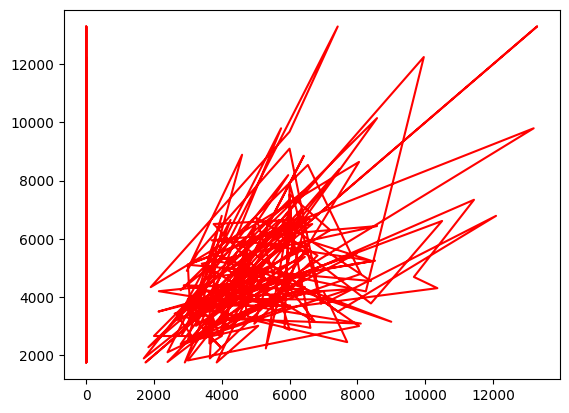

In [69]:
plt.plot(X_MLR_TEST, house_model_mlr.predict(X_MLR_TEST), color='red')
plt.show()

In [72]:
multi_prediction = X_MLR_TEST

In [73]:
multi_prediction['PREDICT'] = house_model_mlr.predict(X_MLR_TEST)

In [74]:
multi_prediction

,price,area,bedrooms,bathrooms,stories,parking,PREDICT
316,4060.0,5900,4,2,2,1,4060.0
77,6650.0,6500,3,2,3,0,6650.0
360,3710.0,4040,2,1,1,0,3710.0
90,6440.0,5000,3,1,2,0,6440.0
493,2800.0,3960,3,1,1,0,2800.0
...,...,...,...,...,...,...,...
395,3500.0,3600,6,1,2,1,3500.0
425,3360.0,3185,2,1,1,2,3360.0
195,4970.0,4410,4,3,2,2,4970.0
452,3150.0,9000,3,1,2,2,3150.0


In [76]:
df_house.iloc[316]

price                    4060.0
area                       5900
bedrooms                      4
bathrooms                     2
stories                       2
mainroad                     no
guestroom                    no
basement                    yes
hotwaterheating              no
airconditioning              no
parking                       1
prefarea                     no
furnishingstatus    unfurnished
Name: 316, dtype: object